### Large Language Models and Text Generation

__Intructor : Emily McMilin UG, PHD at Stanford, worked at apple__

__Lesson Objectives__

#### By the end of this lesson, you will be able to:

* Differentiate between LLM architecture types
* Manually design prompts for LLMs based on current best practices
* Apply modern prompt engineering strategies
* Confidently adjust inference and decoding hyperparameters to suit your use case
* Understand LLM limitations and capabilities
* Identify tasks poorly suited for LLMs and apply augmentation methods to address limitations
  
#### Lesson Prerequisites
Before starting this lesson, you should already be able to:

* Use Python at an intermediate level, including creating variables, importing libraries, writing functions, and extracting information from nested data structures
* Describe the high-level history and landscape of machine learning, artificial intelligence, and generative AI


__Exponential Growth__

In this plot along the x-axis, we see LLM publication dates, and along the y-axis, we see a logarithmic scale of computational petaFLOPS (10^15 Floating Point Operations per Second). The initial trend appears clear: LLM computational requirements are continuing to grow exponentially with time, up until GPT-3 came out.

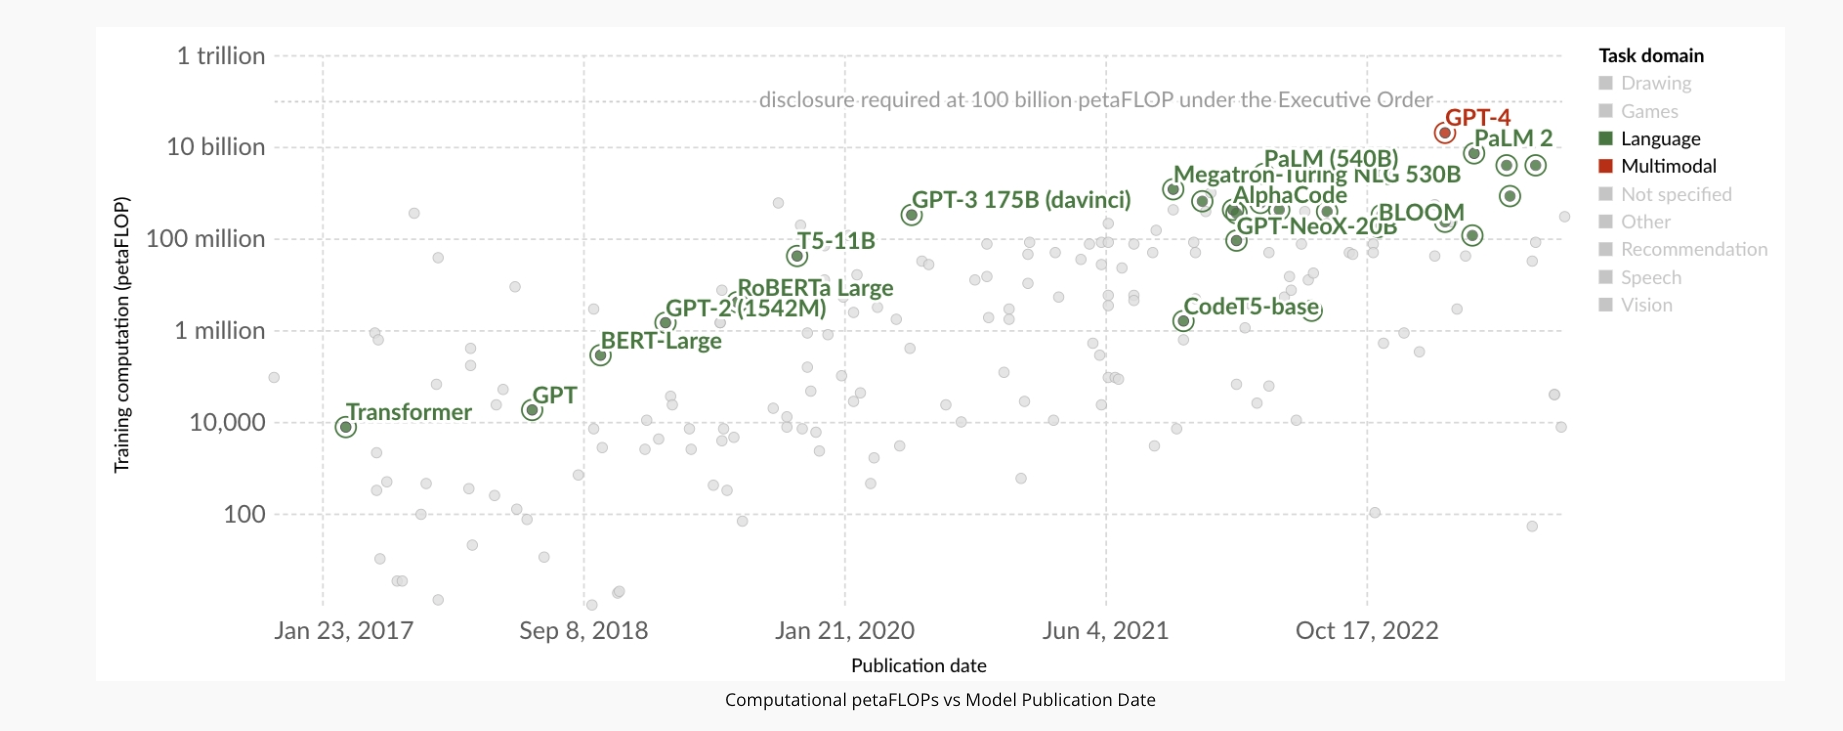

#### A Transformer is Born
In mid-2017, Google published `"Attention Is All You Need"`(opens in a new tab) and introduced the Transformer model to the world. There are many wonderful works explaining the Transformer model, in particular the Illustrated Transformer(opens in a new tab) (a wonderful introduction) and the Annotated Transformer(opens in a new tab) (with a line-by-line implementation in Python).

#### Encoder-only Models
The first LLM to gain broad adoption was `BERT(Bidirectional Encoder Representations from Transformers)`, an encoder-only model. Encoder-only models are most commonly used as base models for subsequent fine-tuning with a distinct objective, e.g. for the inference-time task of binary classification of movie reviews.

#### Decoder-only Models
However, before BERT was released, the first `GPT(Generative Pre-Trained Transformer) model`, a decoder-only model, was released by OpenAI. Decoder-only models are most commonly used for the inference-time task of text generation. In distinction to encoder-only models, the Transformer's pre-training objective of next token prediction is very similar to the decoder-only model's inference-time task of text generation.

Trains on masked-out words using a masked language modeling or MLM objective. : Encoder-only

Only trains on about 15% of the tokens in the training datasets. : Encoder-only

Can attend to words on either side of the predicted word. : Encoder-only

Has an autoregressive training objective. : Decoder-only

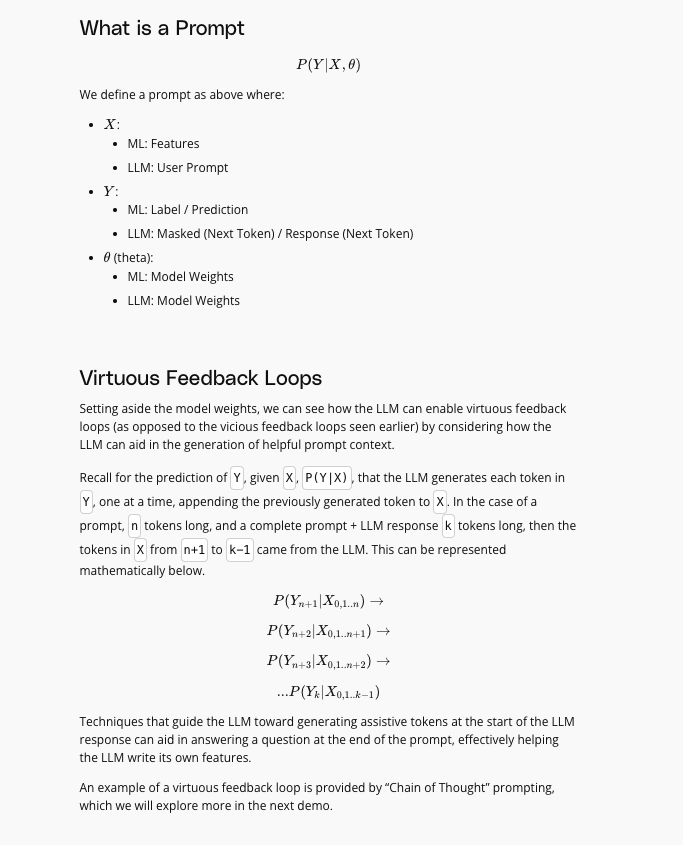

# Differences Between Encoder-Only and Decoder-Only Models in LLMs

### Example Text:
"ChatGPT helps users with their queries."

## Encoder-Only Model (e.g., BERT):

1. **Input Text:** "ChatGPT helps users with their queries."
2. **Step 1: Tokenization**
   - The text is split into tokens (words or subwords): ["ChatGPT", "helps", "users", "with", "their", "queries", "."]

3. **Step 2: Encoding**
   - The encoder processes the entire sentence at once, considering the context of each word within the sentence. For example:
     - "ChatGPT" is understood in the context of "helps users with their queries."
     - "helps" is understood in the context of "ChatGPT" and "users with their queries."

4. **Step 3: Representation**
   - The model creates contextual embeddings for each token, capturing the meaning of each word in relation to the entire sentence. For example:
     - The embedding for "ChatGPT" knows it is an entity helping users.
     - The embedding for "queries" knows it is something users have and ChatGPT helps with.

5. **Output:** 
   - The model can now perform tasks like classification, sentiment analysis, etc., using these contextual embeddings. For instance, classifying the sentence as having a "helpful" sentiment.

## Decoder-Only Model (e.g., GPT):

1. **Input Prompt:** "ChatGPT helps users with"
2. **Step 1: Tokenization**
   - The input prompt is split into tokens: ["ChatGPT", "helps", "users", "with"]

3. **Step 2: Decoding**
   - The decoder generates the next word in the sequence one token at a time, using only the previous tokens. For example:
     - Predict the next word after "ChatGPT helps users with".
     - The model might predict "their".

4. **Step 3: Next Token Prediction**
   - Using the predicted token, the model updates the input sequence: ["ChatGPT", "helps", "users", "with", "their"]
   - Predict the next word after "ChatGPT helps users with their".
     - The model might predict "queries".

5. **Step 4: Repeat Until Complete**
   - The process repeats until the model decides to stop, generating a full sentence:
     - "ChatGPT helps users with their queries."

6. **Output:**
   - The generated text is now complete and can be used for tasks like text generation or conversation.

### Summary:
- **Encoder-Only:** Processes the whole sentence at once to understand context and meaning.
- **Decoder-Only:** Generates text one word at a time based on the preceding words, creating coherent and contextually relevant text step-by-step.


## Chain of Thoughts in Reasoning

### Definition:
The "chain of thoughts" (CoT) is a reasoning approach where an AI model or an individual breaks down a complex problem into a series of intermediate steps or thoughts. This method helps in systematically arriving at a solution by addressing each component of the problem sequentially.

### Process:
1. **Problem Identification:** Understand the problem statement.
2. **Breaking Down:** Decompose the problem into smaller, manageable parts.
3. **Step-by-Step Reasoning:** Address each part individually, building upon the previous step.
4. **Integration:** Combine the results of all steps to form the final solution.

### Example:

#### Problem:
A farmer has 15 apples. He gives 3 apples to each of his 4 friends. How many apples does he have left?

#### Chain of Thoughts:
1. **Identify the Total Apples:**
   - The farmer starts with 15 apples.

2. **Determine Apples Given to Each Friend:**
   - The farmer gives 3 apples to each friend.

3. **Calculate Total Apples Given Away:**
   - The farmer has 4 friends, and each gets 3 apples.
   - Total apples given = 4 friends * 3 apples/friend = 12 apples.

4. **Subtract Apples Given from Total Apples:**
   - The farmer initially had 15 apples.
   - After giving away 12 apples, the farmer has: 15 apples - 12 apples = 3 apples.

#### Conclusion:
The farmer has 3 apples left.

#### Breakdown of the Example:
1. **Initial Problem Statement:** 
   - Farmer starts with 15 apples.
2. **Decomposition:** 
   - Calculate the total apples given away: 4 friends * 3 apples each.
3. **Intermediate Calculation:** 
   - 4 * 3 = 12 apples.
4. **Final Calculation:** 
   - Subtract the given apples from the total: 15 - 12.
5. **Final Answer:**
   - The farmer has 3 apples remaining.

### Benefits of Chain of Thoughts:
- **Clarity:** Breaking down the problem ensures each step is clearly understood.
- **Accuracy:** Reduces the chances of errors by addressing each part methodically.
- **Simplicity:** Simplifies complex problems into more manageable tasks.
- **Traceability:** Each step can be reviewed independently to verify correctness.

### Application in AI:
In AI, chain of thoughts is used to improve the model’s performance on tasks requiring logical reasoning, problem-solving, and multi-step calculations. By generating intermediate steps, AI models can produce more accurate and interpretable solutions.


| **Aspect**            | **Open Models**                                               | **Closed Models**                                                |
|-----------------------|---------------------------------------------------------------|------------------------------------------------------------------|
| **Definition**        | Models with publicly available source code and architecture.  | Proprietary models with restricted access and controlled usage.  |
| **Transparency**      | High - Architecture, algorithms, and data are accessible.     | Low - Limited insight into the workings of the model.            |
| **Community**         | Strong - Encourages collaboration and peer review.            | Weak - Limited external collaboration and review.                |
| **Customization**     | High - Can be adapted and modified to fit specific needs.     | Low - Limited or no customization options.                       |
| **Educational Value** | High - Valuable for learning, research, and experimentation.  | Low - Limited access for educational purposes.                   |
| **Reproducibility**   | High - Easy to reproduce experiments and validate results.    | Low - Difficult to reproduce due to restricted access.           |
| **Security**          | Moderate - Potential risks of misuse and malicious changes.   | High - Protected from external tampering and misuse.             |
| **Quality Control**   | Variable - Quality depends on community contributions.        | High - Maintained by the developing entity.                      |
| **Monetization**      | Challenging - Hard to monetize open-source contributions.     | Strong - Can be monetized as proprietary products or services.   |
| **Intellectual Property** | Low - IP is shared openly, risking competitive edge.       | High - Protects IP and maintains exclusivity.                    |
| **Examples**          | BERT, GPT-2, Hugging Face Transformers                        | GPT-3 (initially), Google’s AlphaFold, IBM Watson                |
| **Costs**             | Low - Generally free or minimal costs associated.             | High - Licensing or usage fees might be required.                |
| **Innovation Speed**  | Fast - Accelerated by community contributions and peer review.| Slow - Limited by internal resources and isolated development.   |
| **Adaptation**        | Flexible - Easily adaptable for various applications.         | Rigid - Restricted to the original design and intended use.      |
| **Brand Reputation**  | Moderate - Shared advancements may dilute brand exclusivity.  | High - Maintains technological superiority and exclusivity.      |


## Prompt Design vs. Prompt Engineering

### Definition:
**Prompt Design** and **Prompt Engineering** are both critical aspects of interacting with AI models, but they focus on different elements of crafting effective inputs.

#### Prompt Design:
**Prompt Design** involves creating prompts that are clear, concise, and contextually appropriate to elicit the desired response from an AI model.

#### Prompt Engineering:
**Prompt Engineering** is a more technical process that involves refining and optimizing prompts to improve the performance and output quality of AI models. It often includes iterative testing, tweaking parameters, and leveraging advanced techniques.

### Components and Focus Areas:

| **Aspect**              | **Prompt Design**                                           | **Prompt Engineering**                                          |
|-------------------------|-------------------------------------------------------------|------------------------------------------------------------------|
| **Goal**                | Craft clear and effective prompts.                          | Optimize and refine prompts for better model performance.        |
| **Focus**               | Clarity, context, and relevance of the prompt.              | Technical refinement, iterative testing, and advanced techniques. |
| **Audience**            | General users and content creators.                         | Data scientists, AI researchers, and developers.                 |
| **Skills Required**     | Understanding of the problem domain and clear communication.| Technical expertise in AI and machine learning.                  |
| **Process**             | Creating prompts based on task requirements.                | Iteratively improving prompts using feedback and model analysis.  |
| **Techniques Used**     | Basic instruction and context setting.                      | Parameter tuning, few-shot learning, prompt templates, etc.      |

### Detailed Breakdown:

#### Prompt Design:

1. **Goal:**
   - To create prompts that are easy to understand and directly address the task at hand.
2. **Focus:**
   - Ensuring the prompt is clear, provides sufficient context, and is relevant to the desired outcome.
3. **Audience:**
   - Aimed at general users, content creators, and educators who need to interact with AI models effectively.
4. **Skills Required:**
   - Requires a good understanding of the problem domain and the ability to communicate effectively.
5. **Process:**
   - Involves crafting prompts based on the requirements of the task, ensuring they are well-structured and contextually appropriate.
6. **Techniques Used:**
   - Basic techniques such as providing clear instructions, setting context, and including necessary data or examples.

#### Example of Prompt Design:
- **Task:** Summarize an article about climate change.
- **Prompt Design:** "Read the following article about climate change and summarize the main points in 150 words."

#### Prompt Engineering:

1. **Goal:**
   - To enhance the effectiveness and efficiency of prompts, ensuring high-quality outputs from the model.
2. **Focus:**
   - On the technical aspects of prompt formulation, including optimization and iterative improvement.
3. **Audience:**
   - Targeted at data scientists, AI researchers, and developers who work on fine-tuning and improving AI models.
4. **Skills Required:**
   - Requires technical expertise in AI, machine learning, and experience with model training and optimization.
5. **Process:**
   - Involves iterative testing and refinement of prompts, analyzing model responses, and making adjustments to improve performance.
6. **Techniques Used:**
   - Advanced techniques such as few-shot learning, parameter tuning, using prompt templates, and leveraging AI model internals.

#### Example of Prompt Engineering:
- **Task:** Summarize an article about climate change.
- **Initial Prompt:** "Read the following article about climate change and summarize the main points in 150 words."
- **Refinement Process:**
  1. **First Iteration:** Test the initial prompt and analyze the output.
  2. **Adjustment:** Modify the prompt to include more specific instructions or examples.
  3. **Optimized Prompt:** "Read the following article about climate change and summarize the main points in 150 words, focusing on the causes and effects mentioned in the text."

### Summary:
- **Prompt Design** focuses on the clarity and contextual relevance of prompts, making it accessible to general users.
- **Prompt Engineering** involves a deeper technical process to optimize prompts for better performance, targeting data scientists and AI professionals.

Both prompt design and prompt engineering are essential for effective interaction with AI models, each serving different purposes and audiences.


## Understanding LLM Capabilities

### Using Your Intuition

#### LLMs Learn Like Us
- **Training on Human Text:** Large Language Models (LLMs) are trained on human-generated text, similar to what we read every day.
- **Next Token Prediction:** Their main task during training is to predict the next word in a sentence, based on the words that came before.

#### Observing and Learning
- **Learning by Observation:** Think about tasks LLMs might learn just by watching lots of examples.
  - **Example:** Summarizing documents is something LLMs can learn because it’s about understanding and condensing information.
  - **Limitation:** Complex tasks like multi-digit multiplication are harder because they require more than just pattern recognition from reading examples.

#### Tokenization Matters
- **Breaking Down Words:** LLMs break down sentences into smaller pieces called tokens, which can be whole words or parts of words.
  - **Example:** In programming languages or numbers, the way they break down (tokenize) might be very different compared to regular text.
  - **Check Tokens:** It’s useful to see how a model breaks down a sentence into tokens using tools like the GPT-3.5 and GPT-4 Tokenizer.

#### Data and Patterns
- **Understanding Training Data:** Think about how the data the LLMs were trained on might affect their output.
  - **Hypothesize and Test:** Try to come up with ideas about why the model gives certain answers and test those ideas.

#### Summary
- **Intuition Development:** By considering how LLMs are trained, how they break down text, and how their training data affects their output, you can develop a good sense of their strengths and limitations.
